GROUP 10: Thy Bui, Naseem Dabiran, Yifeng Yang 

Narrative of Project: 

We performed basic data analysis on the pima.csv dataset. The pima.csv dataset is data collected from females over the age of 21 that have Pima heritage and was used to predict whether she will get diabetes or no based on diagnostic measurements.


In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv('pima.csv', low_memory = False)

print(len(data)) #number of rows
print(len(data.columns)) #number of variables in dataset

print(data.columns)

768
10
Index(['Unnamed: 0', 'NPG', 'PGL', 'DIA', 'TSF', 'INS', 'BMI', 'DPF', 'AGE',
       'Diabet'],
      dtype='object')


In [3]:
data.head()

,Unnamed: 0,NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE,Diabet
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Unnamed: 0,NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE,Diabet
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,384.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,192.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,384.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,576.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,768.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.corr()

,Unnamed: 0,NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE,Diabet
Unnamed: 0,1.000000,-0.037201,0.012994,0.020953,0.019006,0.001998,0.012320,-0.040326,0.007714,-0.045184
NPG,-0.037201,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PGL,0.012994,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
DIA,0.020953,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
TSF,0.019006,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
INS,0.001998,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.012320,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DPF,-0.040326,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
AGE,0.007714,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Diabet,-0.045184,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
#want to focus on bmi, age, glucose, insulin level, and if they have diabetetes
dfb = pd.DataFrame(data, columns = ['AGE', 'PGL', 'INS', 'BMI', 'DPF', 'Diabet'])
dfb.head()

,AGE,PGL,INS,BMI,DPF,Diabet
0,50,148,0,33.6,0.627,1
1,31,85,0,26.6,0.351,0
2,32,183,0,23.3,0.672,1
3,21,89,94,28.1,0.167,0
4,33,137,168,43.1,2.288,1


In [7]:
dfb.describe()

,AGE,PGL,INS,BMI,DPF,Diabet
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,33.240885,120.894531,79.799479,31.992578,0.471876,0.348958
std,11.760232,31.972618,115.244002,7.884160,0.331329,0.476951
min,21.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,24.000000,99.000000,0.000000,27.300000,0.243750,0.000000
50%,29.000000,117.000000,30.500000,32.000000,0.372500,0.000000
75%,41.000000,140.250000,127.250000,36.600000,0.626250,1.000000
max,81.000000,199.000000,846.000000,67.100000,2.420000,1.000000


array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'PGL'}>],
       [<AxesSubplot:title={'center':'INS'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DPF'}>,
        <AxesSubplot:title={'center':'Diabet'}>]], dtype=object)

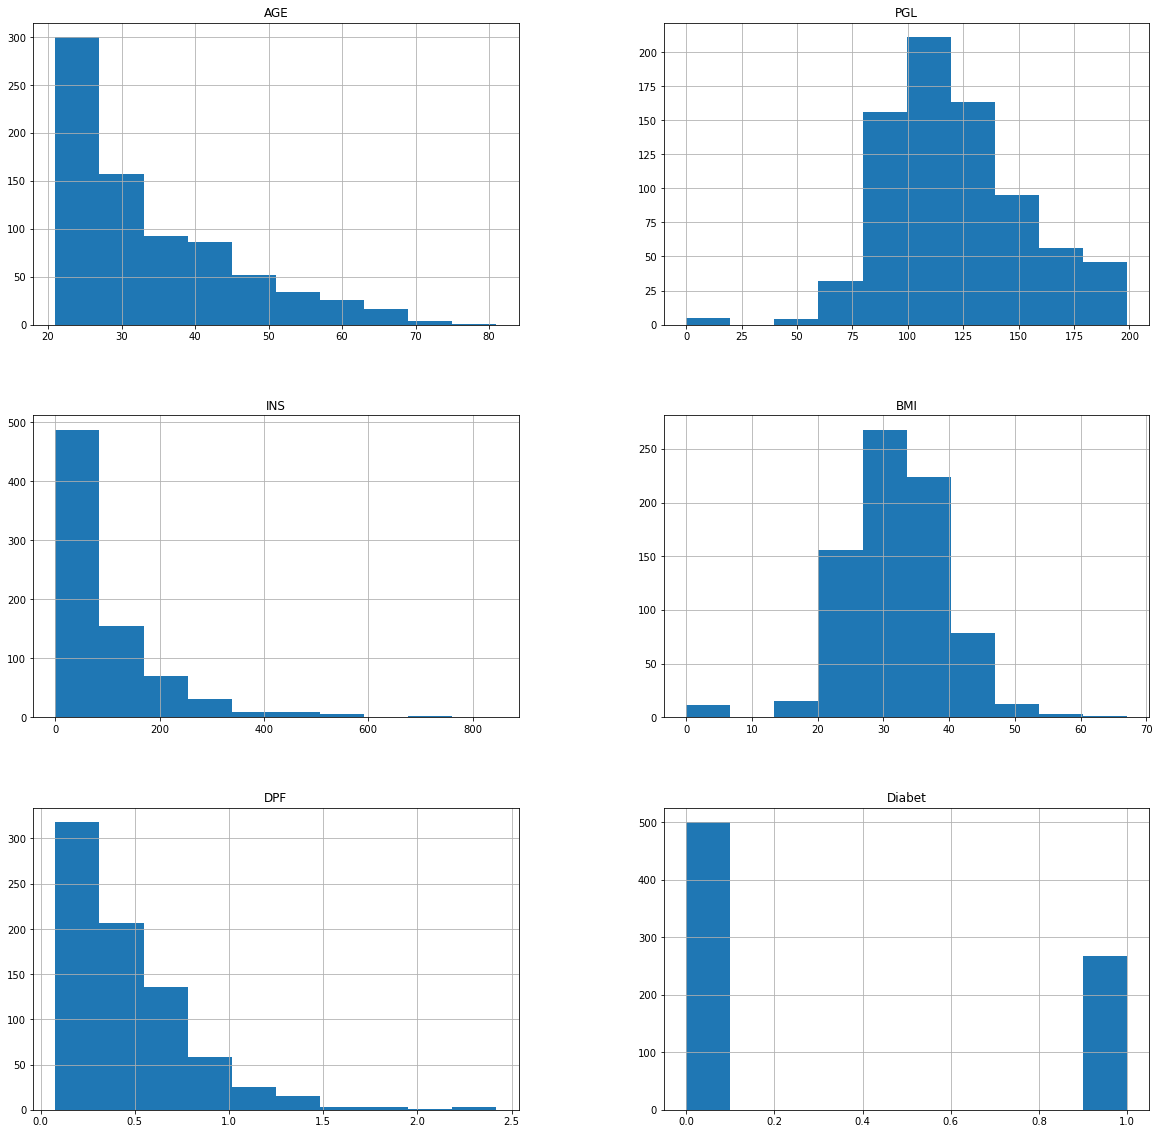

In [8]:
dfb.hist(figsize=(20,20))

In [9]:
dfb.corr()

,AGE,PGL,INS,BMI,DPF,Diabet
AGE,1.000000,0.263514,-0.042163,0.036242,0.033561,0.238356
PGL,0.263514,1.000000,0.331357,0.221071,0.137337,0.466581
INS,-0.042163,0.331357,1.000000,0.197859,0.185071,0.130548
BMI,0.036242,0.221071,0.197859,1.000000,0.140647,0.292695
DPF,0.033561,0.137337,0.185071,0.140647,1.000000,0.173844
Diabet,0.238356,0.466581,0.130548,0.292695,0.173844,1.000000


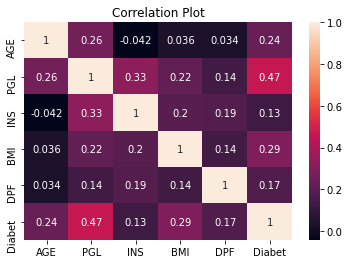

In [10]:
sns.heatmap(dfb.corr(), annot=True)
plt.title('Correlation Plot')
plt.show()

In [11]:
#Find frequency of Pima Native American women who have diabetes
print("Frequency Distribution of Diabetic Women of Pima Heritage")

dfb['Diabet']=dfb['Diabet'].astype('category') #convert to catergorical dtype
dfb['Diabet']=dfb['Diabet'].cat.rename_categories(["Doesn't Have Diabetes", "Has Diabetes"])

#show the counts of who has diabetes and who doesn't
diabetes_freq = dfb['Diabet'].value_counts(sort=False)

print(diabetes_freq)

Frequency Distribution of Diabetic Women of Pima Heritage
Doesn't Have Diabetes    500
Has Diabetes             268
Name: Diabet, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

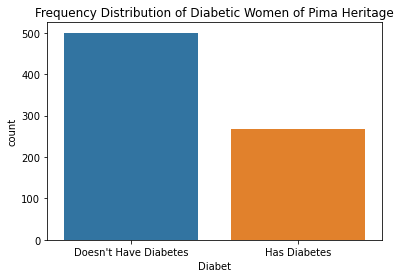

In [12]:
#plot the frequency table
%matplotlib inline
sns.countplot(x='Diabet', data=dfb)
plt.title("Frequency Distribution of Diabetic Women of Pima Heritage")
plt.show

In [13]:
dfb['Diabet'].describe()

count                       768
unique                        2
top       Doesn't Have Diabetes
freq                        500
Name: Diabet, dtype: object

Text(0.5, 1.0, 'Age Distribution Plot')

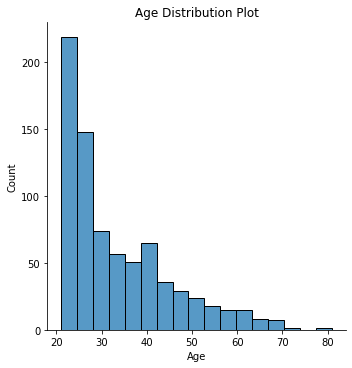

In [14]:
#Plot Age Distribution 
sns.displot(dfb['AGE'].dropna())
plt.xlabel("Age")
plt.title("Age Distribution Plot")

In [15]:
dfb["AGE"].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, "BMI Distribution of those who have Diabetes and those who don't have Diabetes")

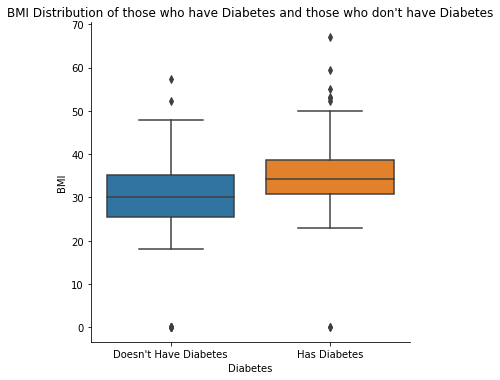

In [16]:
#Plot for BMI and Diabet to show the distributions with respect to category 
sns.catplot(x='Diabet', y='BMI', data=dfb, kind = "box") 
plt.xlabel("Diabetes")
plt.ylabel('BMI')
plt.title("BMI Distribution of those who have Diabetes and those who don't have Diabetes")

Text(0.5, 1.0, "Age Distribution of those who have Diabetes and those who don't have Diabetes")

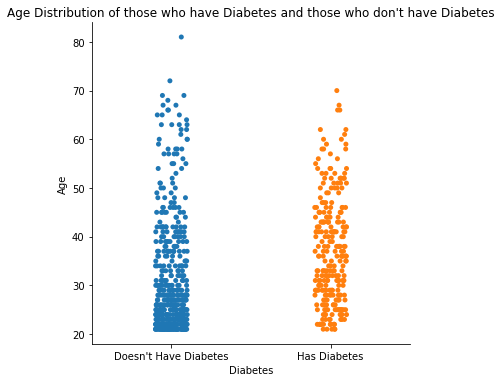

In [17]:
#Plot for Age and Diabet
sns.catplot(x='Diabet', y='AGE', data=dfb) 
plt.xlabel("Diabetes")
plt.ylabel('Age')
plt.title("Age Distribution of those who have Diabetes and those who don't have Diabetes")

Text(0.5, 1.0, "DPF Distribution of those who have Diabetes and those who don't have Diabetes")

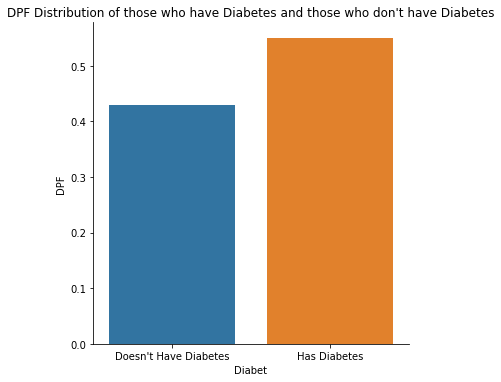

In [18]:
#Plot for DPF and Diabet
sns.catplot(x='Diabet', y='DPF', data=dfb, kind = "bar", ci = False)  
plt.xlabel("Diabet")
plt.ylabel('DPF')
plt.title("DPF Distribution of those who have Diabetes and those who don't have Diabetes")

Text(0.5, 1.0, 'Scatterplot to show the relationship between Insulin and Plasma Glucose Concentration')

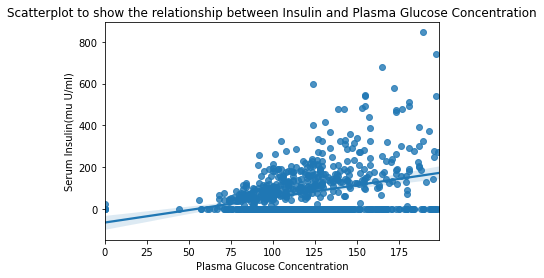

In [19]:
#Linear Regression Model between Glucose Concentration and Insulin Level
sns.regplot(x='PGL', y='INS', data=dfb, fit_reg=True)
plt.ylabel("Serum Insulin(mu U/ml)")
plt.xlabel('Plasma Glucose Concentration')
plt.title("Scatterplot to show the relationship between Insulin and Plasma Glucose Concentration")

In [20]:
#Regression Analysis of Insulin against Glucose Concetration
result=sm.OLS(dfb['INS'], dfb['PGL']).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    INS   R-squared (uncentered):                   0.385
Model:                            OLS   Adj. R-squared (uncentered):              0.384
Method:                 Least Squares   F-statistic:                              479.5
Date:                Sun, 22 May 2022   Prob (F-statistic):                    6.13e-83
Time:                        09:37:14   Log-Likelihood:                         -4699.1
No. Observations:                 768   AIC:                                      9400.
Df Residuals:                     767   BIC:                                      9405.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PGL            0.6950      0.032     21.897      0.000       0.633       0.757
==============================================================================
Omnibus:                      353.348   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1905.284
Skew:                           2.061   Prob(JB):                         0.00
Kurtosis:                       9.523   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""